<a href="https://colab.research.google.com/github/Inha-AI/DACON-semiconductor-competition/blob/feature%2FYoonSungLee/submission_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
df_train = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/train.csv')
df_test = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/test.csv')

In [0]:
# 독립변수와 종속변수를 분리합니다.

train_X = df_train.iloc[:,4:]
train_Y = df_train.iloc[:,0:4]
test_X = df_test.iloc[:,1:]

# Model 8

* 11 layers
* (108, 82, 56, 30) units, he_normal, relu
* BatchNormalization
* Adam(0.008)
* epochs 100
* batch_size 1000
<br><br>
* layer의 층을 두 배로 늘림
* 깊은 layer에 비해 큰 성능을 내지 못함

In [0]:
# 케라스를 통해 모델 생성을 시작합니다.

model_08 = Sequential()
model_08.add(Dense(units= 239, input_dim=226, kernel_initializer='he_normal'))
model_08.add(Dense(units= 239, input_dim=226, kernel_initializer='he_normal'))
model_08.add(BatchNormalization())
model_08.add(Activation('relu'))
model_08.add(Dense(units=252, kernel_initializer='he_normal'))
model_08.add(Dense(units=252, kernel_initializer='he_normal'))
model_08.add(BatchNormalization())
model_08.add(Activation('relu'))
model_08.add(Dense(units=265, kernel_initializer='he_normal'))
model_08.add(Dense(units=265, kernel_initializer='he_normal'))
model_08.add(BatchNormalization())
model_08.add(Activation('relu'))
model_08.add(Dense(units=178, kernel_initializer='he_normal'))
model_08.add(Dense(units=178, kernel_initializer='he_normal'))
model_08.add(BatchNormalization())
model_08.add(Activation('relu'))
model_08.add(Dense(units=91, kernel_initializer='he_normal'))
model_08.add(Dense(units=91, kernel_initializer='he_normal'))
model_08.add(BatchNormalization())
model_08.add(Activation('relu'))
model_08.add(Dense(units=4, activation='linear'))

adam = keras.optimizers.Adam(0.008)
model_08.compile(loss='mae', optimizer=adam, metrics=['accuracy'])

hist = model_08.fit(train_X, train_Y, epochs=100, batch_size=1000, validation_split=0.05)










Train on 769500 samples, validate on 40500 samples
Epoch 1/100





769500/769500 [==============================] - 26s 34us/step - loss: 61.9239 - acc: 0.3500 - val_loss: 68.0679 - val_acc: 0.0229
Epoch 2/100
769500/769500 [==============================] - 16s 20us/step - loss: 32.7979 - acc: 0.6370 - val_loss: 45.7112 - val_acc: 0.4442
Epoch 3/100
769500/769500 [==============================] - 15s 20us/step - loss: 17.7903 - acc: 0.8068 - val_loss: 35.2034 - val_acc: 0.5379
Epoch 4/100
769500/769500 [==============================] - 16s 20us/step - loss: 13.1243 - acc: 0.8541 - val_loss: 30.7152 - val_acc: 0.5595
Epoch 5/100
769500/769500 [==============================] - 15s 20us/step - loss: 10.9148 - acc: 0.8779 - val_loss: 28.8778 - val_acc: 0.5120
Epoch 6/100
769500/769500 [==============================] - 15s 20us/step - loss: 9.6149 - acc: 0.8916 - val_loss: 28.0594 - val_acc: 0.5636
Epoch 7/100
769500/769500 [==============================] - 16s 21us/step - l

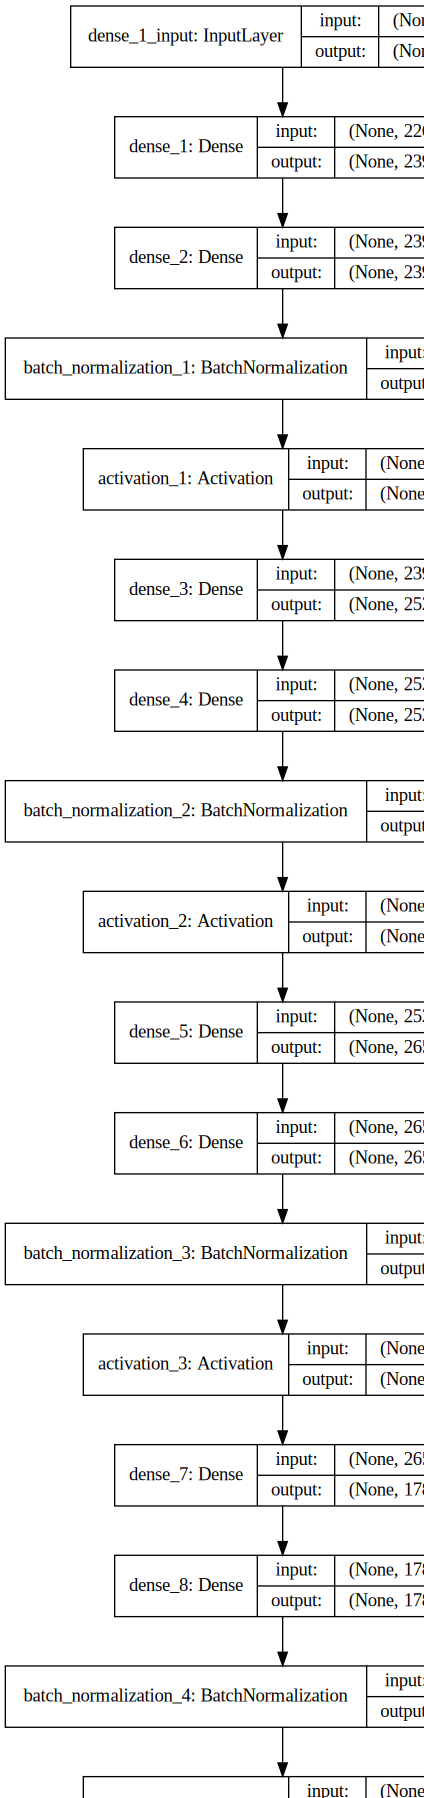

In [0]:
# 모델 아키텍처

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model_08, show_shapes=True).create(prog='dot', format='svg'))

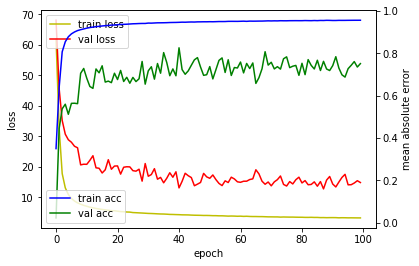

In [0]:
# 학습 과정

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mean absolute error')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
# 예측값을 생성합니다.

pred_test_08 = model_08.predict(test_X)

In [0]:
# submission 파일을 생성합니다.
sample_sub = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test_08
submission.to_csv('/gdrive/My Drive/DACON-semiconductor-competition/submission_08.csv')